## Installing requirements

In [ ]:
!pip list | awk '{if ($0 ~ /^torch/) print $1;}' | xargs pip uninstall -y
!pip list | grep torch

Found existing installation: torch 1.11.0+cu113
Uninstalling torch-1.11.0+cu113:
  Successfully uninstalled torch-1.11.0+cu113
Found existing installation: torchaudio 0.11.0+cu113
Uninstalling torchaudio-0.11.0+cu113:
  Successfully uninstalled torchaudio-0.11.0+cu113
Found existing installation: torchsummary 1.5.1
Uninstalling torchsummary-1.5.1:
  Successfully uninstalled torchsummary-1.5.1
Found existing installation: torchtext 0.12.0
Uninstalling torchtext-0.12.0:
  Successfully uninstalled torchtext-0.12.0
Found existing installation: torchvision 0.12.0+cu113
Uninstalling torchvision-0.12.0+cu113:
  Successfully uninstalled torchvision-0.12.0+cu113


In [ ]:
!pip install -q h5py nltk joblib pandas scipy ninja "yacs>=0.1.8" cython matplotlib tqdm opencv-python "numpy>=1.19.5" timm einops pycocotools cityscapesscripts

     |████████████████████████████████| 108 kB 5.6 MB/s 
     |████████████████████████████████| 431 kB 36.0 MB/s 
     |████████████████████████████████| 472 kB 44.0 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 46 kB 3.1 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 


In [ ]:
!pip install -q torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 38.1 MB/s 
     |████████████████████████████████| 7.6 MB 6.0 MB/s 


In [ ]:
!git clone https://github.com/microsoft/scene_graph_benchmark
%cd scene_graph_benchmark/

Cloning into 'scene_graph_benchmark'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 795 (delta 98), reused 81 (delta 81), pack-reused 657
Receiving objects: 100% (795/795), 21.22 MiB | 29.89 MiB/s, done.
Resolving deltas: 100% (390/390), done.
/content/scene_graph_benchmark


In [ ]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark
copying maskrcnn_benchmark/__init__.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark
creating build/lib.linux-x86_64-3.7/scene_graph_benchmark
copying scene_graph_benchmark/scene_parser.py -> build/lib.linux-x86_64-3.7/scene_graph_benchmark
copying scene_graph_benchmark/registry.py -> build/lib.linux-x86_64-3.7/scene_graph_benchmark
copying scene_graph_benchmark/AttrRCNN.py -> build/lib.linux-x86_64-3.7/scene_graph_benchmark
copying scene_graph_benchmark/__init__.py -> build/lib.linux-x86_64-3.7/scene_graph_benchmark
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/bbox_aug.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/inference.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark/engine
copying maskrcnn_benchmark/engine/trainer.py -> build/lib.linux-x86_64

In [ ]:
# Get prt_model and stuff
!mkdir /content/model
!mkdir /content/scene_graph_benchmark/visualgenome
!wget https://penzhanwu2.blob.core.windows.net/sgg/sgg_benchmark/vinvl_model_zoo/vinvl_vg_x152c4.pth -P /content/model
!wget https://penzhanwu2.blob.core.windows.net/sgg/sgg_benchmark/vinvl_model_zoo/VG-SGG-dicts-vgoi6-clipped.json -P /content/scene_graph_benchmark/visualgenome

--2022-05-03 11:08:46--  https://penzhanwu2.blob.core.windows.net/sgg/sgg_benchmark/vinvl_model_zoo/vinvl_vg_x152c4.pth
Resolving penzhanwu2.blob.core.windows.net (penzhanwu2.blob.core.windows.net)... 52.239.236.68
Connecting to penzhanwu2.blob.core.windows.net (penzhanwu2.blob.core.windows.net)|52.239.236.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 593474486 (566M) [application/octet-stream]
Saving to: ‘/content/model/vinvl_vg_x152c4.pth’

vinvl_vg_x152c4.pth 100%[===================>] 565.98M  34.3MB/s    in 18s     

2022-05-03 11:09:04 (31.9 MB/s) - ‘/content/model/vinvl_vg_x152c4.pth’ saved [593474486/593474486]

--2022-05-03 11:09:04--  https://penzhanwu2.blob.core.windows.net/sgg/sgg_benchmark/vinvl_model_zoo/VG-SGG-dicts-vgoi6-clipped.json
Resolving penzhanwu2.blob.core.windows.net (penzhanwu2.blob.core.windows.net)... 52.239.236.68
Connecting to penzhanwu2.blob.core.windows.net (penzhanwu2.blob.core.windows.net)|52.239.236.68|:443... connected.

## Mount the drive to extract images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import cv2
import json
from google.colab.patches import cv2_imshow

In [ ]:
def print_predictions(filename: str) -> None:
    rgx_attr_class = r"^(.+)\s(\w+)$"
    rgx_attrscore_classcore = r"^(.+)\s(.+)$"
    rgx_attrs_scores = r"(\d+.\d+)"

    results = {}

    with open(filename) as file:
        while True:
            attr_and_class = file.readline()
            scores = file.readline()

            rgx_attr_class_res = re.search(rgx_attr_class, attr_and_class)
            rgx_scores_res = re.search(rgx_attrscore_classcore, scores)

            if rgx_attr_class_res and rgx_scores_res:

                predicted_class = rgx_attr_class_res.group(2)
                prd_class_score = float(rgx_scores_res.group(2))

                if (predicted_class not in results) or (results[predicted_class]["pred_score"] < prd_class_score):
                    attrs = rgx_attr_class_res.group(1).split(",")
                    scores = rgx_scores_res.group(1).split(",")

                    item = dict(
                        pred_score=prd_class_score,
                        attrs=[(attrs[i], float(scores[i])) for i in range(len(attrs))]
                    )

                    results[predicted_class] = item

            if not scores:
                break

    #print(json.dumps(results, indent=4))
    return results

In [ ]:
import os

os.chdir("/content/scene_graph_benchmark")

save results to: output/0.attr.jpg
9.05880833900028


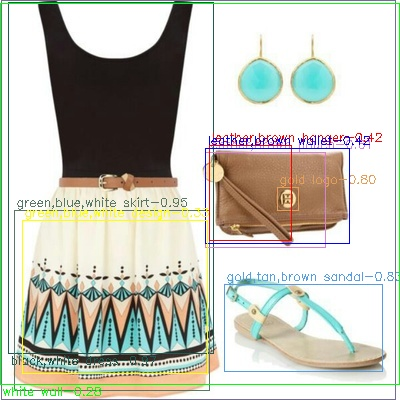

In [ ]:
# Test the model on a basic image
# Read readme on our Github repo before using 

import timeit

start = timeit.default_timer()

!python /content/demo_image.py \
--config_file sgg_configs/vgattr/vinvl_x152c4.yaml \
--img_file /content/sample_data/imgs/0.jpg \
--save_file output/0.attr.jpg \
--visualize_attr \
MODEL.WEIGHT /content/model/vinvl_vg_x152c4.pth \
MODEL.ROI_HEADS.NMS_FILTER 1 \
MODEL.ROI_HEADS.SCORE_THRESH 0.2 \
DATA_DIR "maskrcnn-benchmark/data/datasets" \
TEST.IGNORE_BOX_REGRESSION False \

end = timeit.default_timer()

print(end-start)

img = cv2.imread("output/0.attr.jpg")
cv2_imshow(img)

In [ ]:
# Loop to go through the data 
#(it is recommended to use a maximum of 1000 iterations per loop and save each batch in order to avoid Collab restrictions)

import os
import glob 
from tqdm import tqdm
import pandas as pd
import json

os.chdir("/content/scene_graph_benchmark")

lst = []

for i in tqdm(range(0,5)):

  cmd = "python /content/demo_image.py --config_file sgg_configs/vgattr/vinvl_x152c4.yaml --img_file " +'/content/drive/MyDrive/polyvore/'+ str(i)+'.jpg' + " --save_file output/" + str(i) + ".attr.jpg " + """--visualize_attr MODEL.WEIGHT /content/model/vinvl_vg_x152c4.pth MODEL.ROI_HEADS.NMS_FILTER 1 MODEL.ROI_HEADS.SCORE_THRESH 0.2 DATA_DIR "maskrcnn-benchmark/data/datasets" TEST.IGNORE_BOX_REGRESSION False""" 
  val = os.system(cmd)
  a = print_predictions("/content/scene_graph_benchmark/output/" + str(i) + ".attr.txt")
  with open("/content/scene_graph_benchmark/output/"+ str(i) +".attr-boundary.txt", 'r') as j:
     b = json.loads(j.read())
  id = str(i) + '.jpg'
  lst.append((id,a,b))



100%|██████████| 5/5 [00:47<00:00,  9.47s/it]


In [ ]:
#Save as a dataframe

df = pd.DataFrame(lst, columns =['id', 'Attributes', 'boudaries(X,y,Width,Height)'])

In [ ]:
df.to_csv("occurence.csv", index=False)